# Regression
## Create the data

In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [2]:
from res.plot_lib import plot_data, plot_model, set_default
from matplotlib import pyplot as plt

In [3]:
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
seed = 1
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # num_samples_per_class
D = 1  # dimensions (the input is 1-dimensional, so we need the first linear layer to be 1 x hidden_units)
C = 1  # num_classes
H = 100  # num_hidden_units

In [7]:
a = torch.linspace(-1,1,100)
a.shape
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
X.shape

torch.Size([100, 1])

In [8]:
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1).to(device)
y = X.pow(3) + 0.3 * torch.rand(X.size()).to(device)

In [9]:
X.pow(3)

tensor([[-1.0000e+00],
        [-9.4061e-01],
        [-8.8362e-01],
        [-8.2898e-01],
        [-7.7664e-01],
        [-7.2655e-01],
        [-6.7866e-01],
        [-6.3292e-01],
        [-5.8929e-01],
        [-5.4771e-01],
        [-5.0813e-01],
        [-4.7051e-01],
        [-4.3479e-01],
        [-4.0092e-01],
        [-3.6887e-01],
        [-3.3856e-01],
        [-3.0997e-01],
        [-2.8303e-01],
        [-2.5770e-01],
        [-2.3393e-01],
        [-2.1167e-01],
        [-1.9086e-01],
        [-1.7147e-01],
        [-1.5343e-01],
        [-1.3671e-01],
        [-1.2125e-01],
        [-1.0700e-01],
        [-9.3914e-02],
        [-8.1941e-02],
        [-7.1031e-02],
        [-6.1135e-02],
        [-5.2203e-02],
        [-4.4187e-02],
        [-3.7037e-02],
        [-3.0703e-02],
        [-2.5136e-02],
        [-2.0286e-02],
        [-1.6103e-02],
        [-1.2539e-02],
        [-9.5445e-03],
        [-7.0690e-03],
        [-5.0634e-03],
        [-3.4783e-03],
        [-2

In [15]:
print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

Shapes:
X: (100, 1)
y: (100, 1)


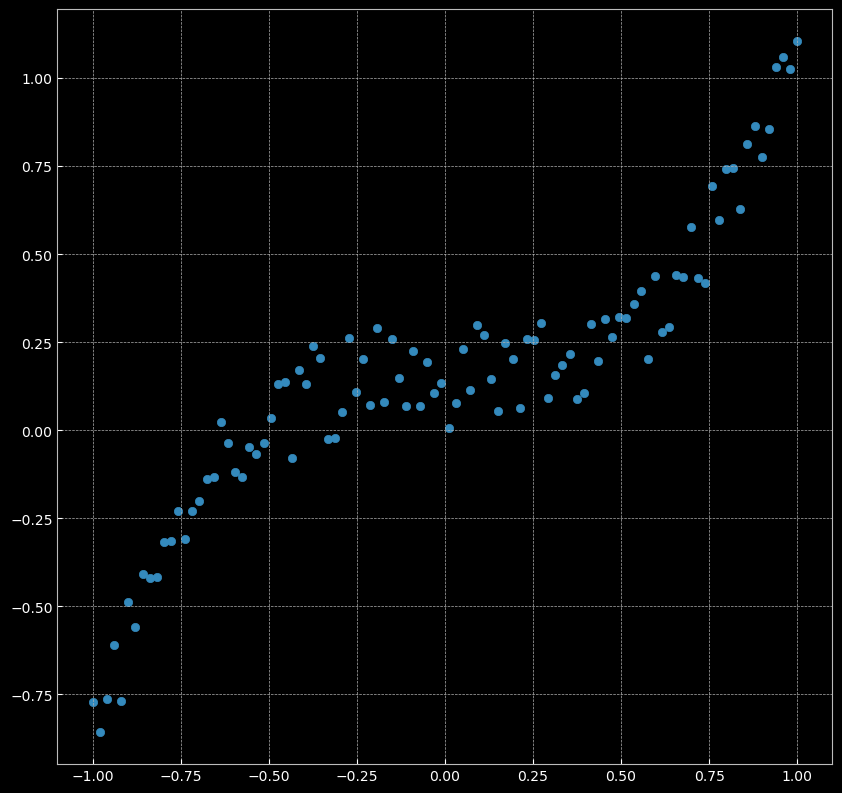

In [11]:
plt.scatter(X.cpu().numpy(), y.cpu().numpy())
plt.axis('equal');

## Linear model

In [12]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [13]:
# nn package to create our linear model
# each Linear module has a weight and bias
model = nn.Sequential(
    nn.Linear(D, H), 
    nn.Linear(H, C)
)
model.to(device) # Convert to CUDA

# nn package also has different loss functions.
# we use MSE loss for our regression task
criterion = torch.nn.MSELoss()

# we use the optim package to apply
# stochastic gradient descent for our parameter updates
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# Training

num_epochs = 1000
for t in range(num_epochs):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss (MSE)
    loss = criterion(y_pred, y)
    print("[EPOCH]: %i, [LOSS or MSE]: %.6f" % (t, loss.item()))
    display.clear_output(wait=True)
    
    # zero the gradients before running
    # the backward pass.
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient
    # of loss w.r.t our learnable params. 
    loss.backward()
    
    # Update params
    optimizer.step()

[EPOCH]: 999, [LOSS or MSE]: 0.029701


In [14]:
# Plot trained model
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=1, bias=True)
)


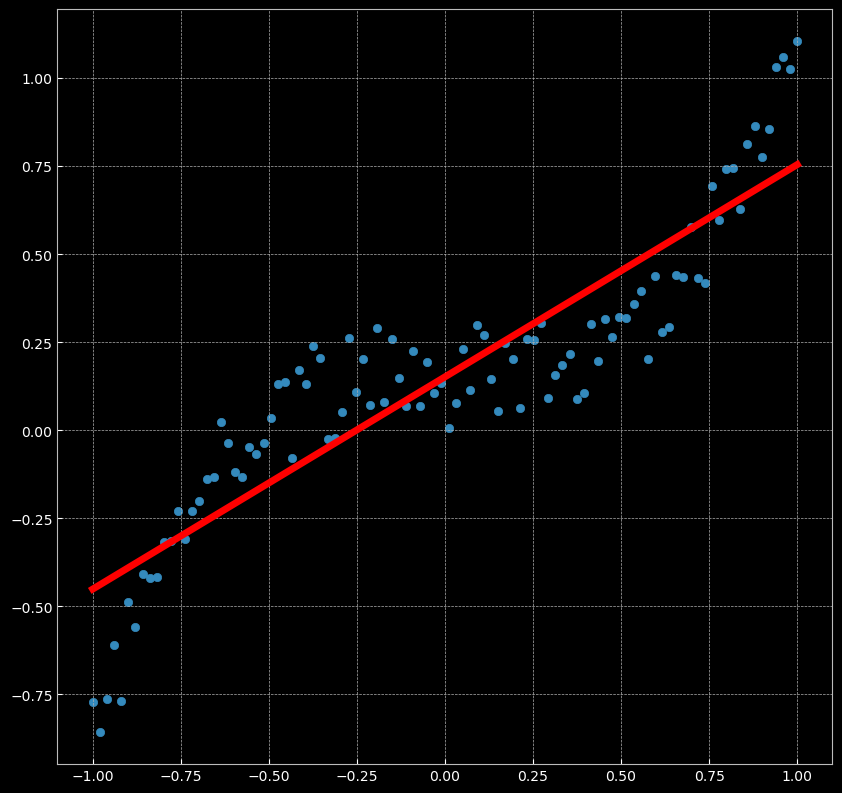

In [16]:
plt.scatter(X.data.cpu().numpy(), y.data.cpu().numpy())
plt.plot(X.data.cpu().numpy(), y_pred.data.cpu().numpy(), 'r-', lw=5) # y_pred comes from the last epoch
plt.axis('equal');

## Two-layered network

In [17]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [22]:
5 // 2

2

In [18]:
# Number of networks
n_networks = 10
models = list()
y_pretrain = list()

# nn package also has different loss functions.
# we use MSE for a regression task
criterion = torch.nn.MSELoss()

for mod in range(n_networks):
    # nn package to create our linear model
    # each Linear module has a weight and bias
    model = nn.Sequential(
        nn.Linear(D, H),
        nn.ReLU() if mod < n_networks // 2 else nn.Tanh(), # The first half has ReLU, the second half has Tanh
        nn.Linear(H, C)
    )
    model.to(device)
    
    # Append models
    models.append(model)

    # we use the optim package to apply
    # ADAM for our parameter updates
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

    # e = 1.  # plotting purpose

    # Training
    for t in range(1000):

        # Feed forward to get the logits
        y_pred = model(X)
        
        # Append pre-train output
        if t == 0:
            y_pretrain.append(y_pred.detach())

        # Compute the loss and accuracy
        loss = criterion(y_pred, y)
        print(f"[MODEL]: {mod + 1}, [EPOCH]: {t}, [LOSS]: {loss.item():.6f}")
        display.clear_output(wait=True)

        # zero the gradients before running
        # the backward pass.
        optimizer.zero_grad()

        # Backward pass to compute the gradient
        # of loss w.r.t our learnable params. 
        loss.backward()

        # Update params
        optimizer.step()

[MODEL]: 10, [EPOCH]: 999, [LOSS]: 0.007534


In [19]:
print(models[0], models[-1])

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
) Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): Tanh()
  (2): Linear(in_features=100, out_features=1, bias=True)
)


In [20]:
models

[Sequential(
   (0): Linear(in_features=1, out_features=100, bias=True)
   (1): ReLU()
   (2): Linear(in_features=100, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=1, out_features=100, bias=True)
   (1): ReLU()
   (2): Linear(in_features=100, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=1, out_features=100, bias=True)
   (1): ReLU()
   (2): Linear(in_features=100, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=1, out_features=100, bias=True)
   (1): ReLU()
   (2): Linear(in_features=100, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=1, out_features=100, bias=True)
   (1): ReLU()
   (2): Linear(in_features=100, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=1, out_features=100, bias=True)
   (1): Tanh()
   (2): Linear(in_features=100, out_features=1, bias=True)
 ),
 Sequential(
   (0): Linear(in_features=1, out_features=100, bias=True)
   (1): Tanh()
   (2): Linea

## Predictions: Before Training

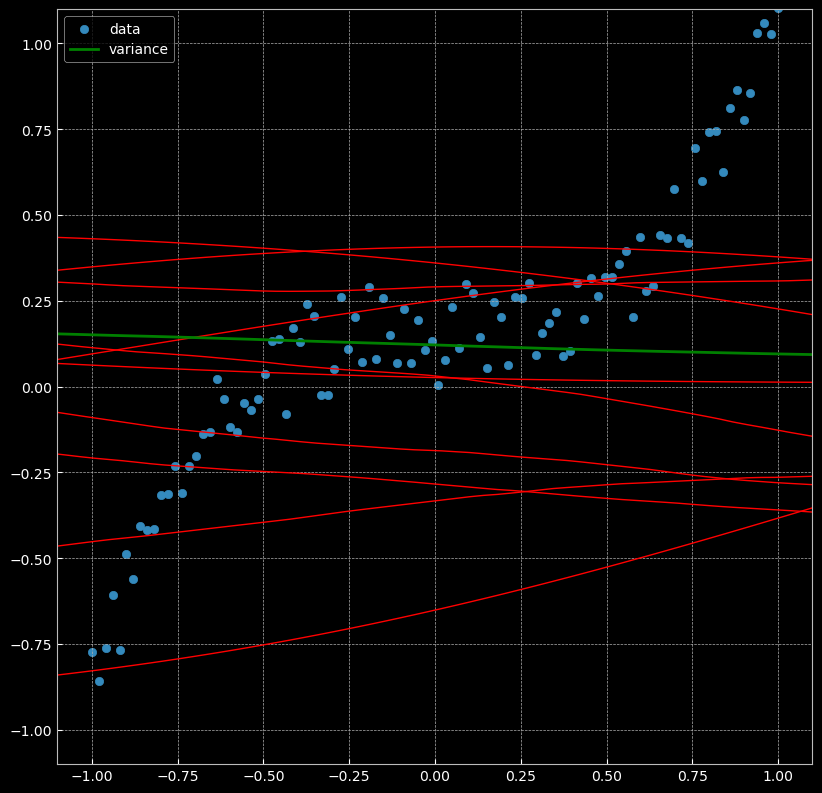

In [21]:
for y_pretrain_idx in y_pretrain:
    # New X that ranges from -5 to 5 instead of -1 to 1
    X_new = torch.unsqueeze(torch.linspace(-2, 2, 100), dim=1)
        
    plt.plot(X_new.numpy(), y_pretrain_idx.cpu().numpy(), 'r-', lw=1)

plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
plt.axis('square')
plt.axis((-1.1, 1.1, -1.1, 1.1));
y_combo = torch.stack(y_pretrain)
plt.plot(X_new.numpy(), y_combo.var(dim=0).cpu().numpy(), 'g', label='variance');
plt.legend()

## Predictions: After Training

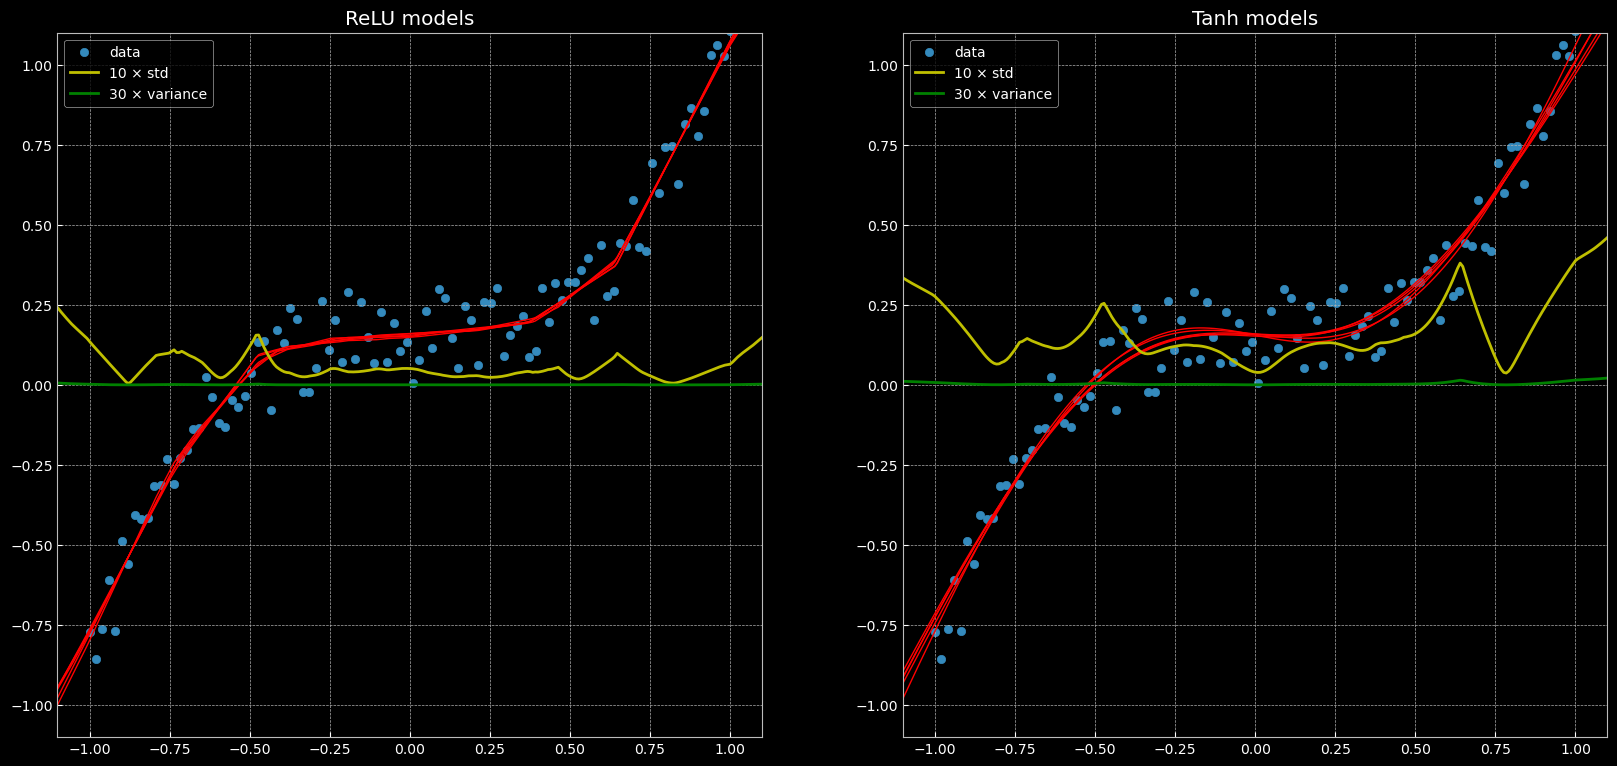

In [22]:
y_pred = list()
relu_models = models[:n_networks // 2]
tanh_models = models[n_networks // 2:]
plt.figure(figsize=(20, 10))

def dense_prediction(models, non_linearity, zoom):
    plt.subplot(1, 2, 1 if non_linearity == 'ReLU' else 2)
    for model in models:
        # New X that ranges from -5 to 5 instead of -1 to 1
        X_new = torch.unsqueeze(torch.linspace(-4, 4, 1001), dim=1).to(device)

        # Getting predictions from input
        with torch.no_grad():
            y_pred.append(model(X_new))

        plt.plot(X_new.cpu().numpy(), y_pred[-1].cpu().numpy(), 'r-', lw=1)
    plt.scatter(X.cpu().numpy(), y.cpu().numpy(), label='data')
    plt.axis('square')
    plt.axis(torch.tensor((-1.1, 1.1, -1.1, 1.1)) * zoom);
    y_combo = torch.stack(y_pred)
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().sqrt().numpy(), 'y', label='10 × std')
    plt.plot(X_new.cpu().numpy(), 10 * y_combo.var(dim=0).cpu().numpy(), 'g', label='30 × variance')
    plt.legend()
    plt.title(non_linearity + ' models')

z = 1  # try 1 or 4
dense_prediction(relu_models, 'ReLU', zoom=z)
dense_prediction(tanh_models, 'Tanh', zoom=z)